In [1]:
import pandas as pd
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
#Definción de variables
df_nlp= pd.DataFrame()

In [4]:
#Lectura en ficheros de los IDS de Twitter
def readTweet(dataframe,file):
    dataframe = pd.read_csv(file,sep=',')
    return dataframe


df_tweets=readTweet(df_nlp,'info_tweets_el_corte_ingles_03052020.csv')
df_tweets

,created_at,id_str,user,text
0,2020-04-25 07:05:48,1253943276496961537,520606857,@elcorteinglesac @elcorteingles @MRW_clientes @mrw_es 3 dias intentando ponerme en contacto #elcorteingles y #mrw y… https://t.co/Z9lxiVGdDC
1,2020-04-25 07:50:08,1253954430489288704,1145359822206001152,RT @RHMRaul: @elcorteinglesac @elcorteingles @MRW_clientes @mrw_es 3 dias intentando ponerme en contacto #elcorteingles y #mrw y ea imposib…
2,2020-04-25 10:58:09,1254001745979756545,1014801210128429056,RT @LaLiga: ¿En cuál de estos equipos NO HA JUGADO nunca Albiol? \n\n🧐📌 @realmadrid \n🧐📌 @realracingclub \n🧐📌 @valenciacf \n🧐📌 @VillarrealCF \n🧐📌…
3,2020-04-25 11:07:02,1254003981388525568,900671288687177728,"RT @tecno_guru: Portátil Gaming HP OMEN X 2S, ahora con descuento de 400 euros\n\n#gurutecno.com #hp #hpomen #hpomenx2s #portatil #gaming #in…"
4,2020-04-25 11:18:34,1254006885080014849,371859688,"RT @tecno_guru: Portátil Gaming HP OMEN X 2S, ahora con descuento de 400 euros\n\n#gurutecno.com #hp #hpomen #hpomenx2s #portatil #gaming #in…"
...,...,...,...,...
224,2020-05-02 20:52:42,1256688085380870152,450152128,RT @JesusNavarro: 🔴 #ÚltimaHora\nFallece con 52 años el director de #ElCorteInglés de #Málaga al sufrir un #infarto mientras se encontraba e…
225,2020-05-02 21:07:11,1256691730256191488,355452662,RT @Pako_roman: Necesito a alguien que trabaje en ATENCIÓN AL CLIENTE de #elcorteingles de Nervión o de la sección BEBE. El 20 de Mayo cump…
226,2020-05-02 21:20:02,1256694965801009152,949884697,RT @Pako_roman: Necesito a alguien que trabaje en ATENCIÓN AL CLIENTE de #elcorteingles de Nervión o de la sección BEBE. El 20 de Mayo cump…
227,2020-05-02 23:26:24,1256726765608845313,753371469132988416,RT @Pako_roman: Necesito a alguien que trabaje en ATENCIÓN AL CLIENTE de #elcorteingles de Nervión o de la sección BEBE. El 20 de Mayo cump…


In [5]:
df_tweets['text']

0      @elcorteinglesac @elcorteingles @MRW_clientes @mrw_es 3 dias intentando ponerme en contacto #elcorteingles y #mrw y… https://t.co/Z9lxiVGdDC      
1      RT @RHMRaul: @elcorteinglesac @elcorteingles @MRW_clientes @mrw_es 3 dias intentando ponerme en contacto #elcorteingles y #mrw y ea imposib…      
2      RT @LaLiga: ¿En cuál de estos equipos NO HA JUGADO nunca Albiol? \n\n🧐📌 @realmadrid \n🧐📌 @realracingclub \n🧐📌 @valenciacf \n🧐📌 @VillarrealCF \n🧐📌…
3      RT @tecno_guru: Portátil Gaming HP OMEN X 2S, ahora con descuento de 400 euros\n\n#gurutecno.com #hp #hpomen #hpomenx2s #portatil #gaming #in…    
4      RT @tecno_guru: Portátil Gaming HP OMEN X 2S, ahora con descuento de 400 euros\n\n#gurutecno.com #hp #hpomen #hpomenx2s #portatil #gaming #in…    
                                                                            ...                                                                          
224    RT @JesusNavarro: 🔴 #ÚltimaHora\nFallece con 52 años el director de #

# Ejemplos de NLP Tweets

In [9]:
positivo=0
negativo=0
neutral=0
polarity=0
tweetPositivo = []
tweetNeutro = []

for tweet in df_tweets['text']:
    
    analysis = TextBlob(tweet)
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity ==0 ):
        neutral +=1
        tweetNeutro.append(tweet)
    elif (analysis.sentiment.polarity < 0):
        negativo +=1
    elif (analysis.sentiment.polarity > 0):
        positivo +=1
        tweetPositivo.append(tweet)
        
positivo = 100*float(positivo)/float(229)
print('Positivo:', positivo,'%')
negativo = 100*float(negativo)/float(229)
print('Negativo:', negativo,'%')
neutral = 100*float(neutral)/float(229)
print('Neutral:', neutral,'%')

print("Como reacciona la gente antes el COVID")
print('------------------')
print(tweetPositivo)
print('------------------')
print(tweetNeutro)


Positivo: 12.22707423580786 %
Negativo: 2.6200873362445414 %
Neutral: 85.1528384279476 %
Como reacciona la gente antes el COVID
------------------
['🌀 Pantalla inteligente Lenovo Smart Display 10". #ElCorteIngles 🇪🇸\n\n💶 Precio oferta: 99.99€ 💥 (PVP normal: 239.99€)… https://t.co/RKjz9qdtic', '🌀 Monitor PC 68,6 cm (27") LG 27MK600M Full HD IPS, Radeon FreeSync. #ElCorteIngles 🇪🇸\n\n💶 Precio oferta: 139€ 💥 (PV… https://t.co/0i6bnextlf', '🌀 Pantalón de niños SST adidas Originals. #ElCorteIngles 🇪🇸\n\n💶 Precio oferta: 24.45€ 💥 (PVP normal: 34.95€)\n\n💳 Enla… https://t.co/EamAFI2ZeH', 'Enlace al post completo: https://t.co/fTFml6TG7p \n\u200d  SMART TV SONY XF90 65"!! #ElCorteIngles.\n\nChollazo para el par… https://t.co/dZzQ2AVDJk', '🌀 Camiseta de niños  Badge of Sport Must Haves adidas. #ElCorteIngles 🇪🇸\n\n💶 Precio oferta: 12.55€ 💥 (PVP normal: 17… https://t.co/aELJ1I4FfA', '🌀 Piscina de burbujas hinchable Buscando a Dory Disney. #ElCorteIngles 🇪🇸\n\n💶 Precio oferta: 20€ 💥 (PVP normal: 

# Lo representamos en un gráfico de tartas

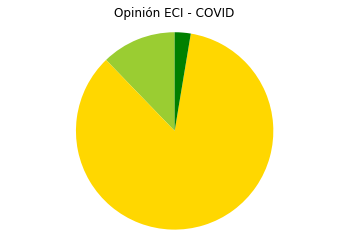

In [11]:
labels = ['Positivo ['+str(positivo)+'%]','Neutral ['+str(neutral)+'%]','Negativo ['+str(negativo)+'%]']
sizes = [positivo,neutral,negativo]
colors =['yellowgreen','gold','green']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.title('Opinión ECI - COVID')
plt.axis('equal')
plt.show()
